# Notebook 10.7

In [2]:
# suppress warning messages from pymc3
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# import statistical and plotting packages
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as ss
import toyplot

### Simulating data

A linear regression model that relates age and height of a tree with the number of branches.

In [4]:
# true params (what we aim to estimate)
nsize = 500
true_Beta1 = 10
true_Beta2 = -2
true_alpha = 1
true_error = 3

# predictor variables (measurements on data)
age = np.random.normal(20, 2, nsize)
height = np.random.normal(10, 50, nsize)
e = np.random.normal(0, true_error, nsize)

# simulated outcome (sampled response data)
branches = true_alpha + true_Beta1 * age + true_Beta2 * height + e

In [5]:
# plot the data
canvas = toyplot.Canvas(width=600, height=250)
ax0 = canvas.cartesian(grid=(1, 2, 0), ylabel="Beta1", xlabel="age")
ax1 = canvas.cartesian(grid=(1, 2, 1), ylabel="Beta2", xlabel="height")
ax0.scatterplot(age, u)
ax1.scatterplot(height, u);

15 20 25 X1 0 250 500 Beta1 <g class="toyplot-Datum" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity

### Setting up the model

In [7]:
with pm.Model() as model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    betas = pm.Normal('betas', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + betas[0]*age + betas[1]*height

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=branches)

### Fitting model

In [8]:
with model:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, betas, alpha]
The acceptance probability does not match the target. It is 0.993541124666, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 1765 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.172329667767, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


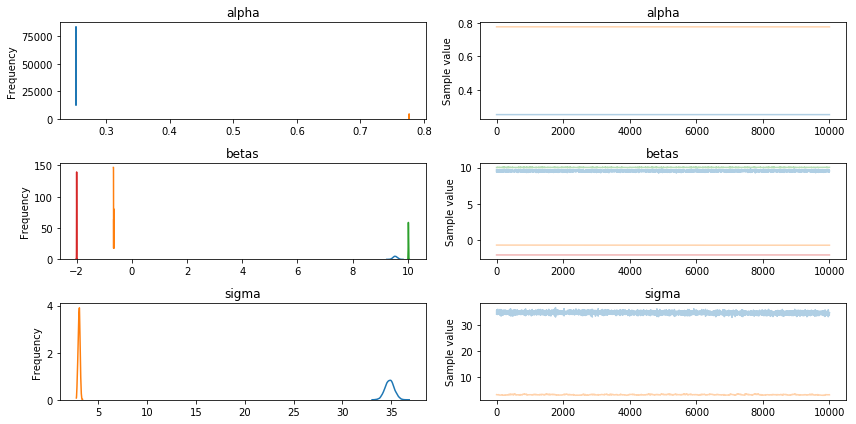

In [9]:
pm.traceplot(trace);

### Estimated parameters

In [10]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.514867,0.261558,0.026156,0.253292,0.776575,1.0,3785.116477
betas__0,9.779375,0.246067,0.023991,9.440427,10.037072,1.0,6.256040
betas__1,-1.329118,0.671262,0.067126,-2.004744,-0.648469,1.0,193.057667
sigma,18.933395,15.882558,1.587920,2.824236,35.436418,1.0,66.569249


I fitted a linear regression model similar to the notebook 10.4 example. However, I increased the variance in one of my "observed" variables, the height. That made the MCMC take much longer to finish. Nevertheless, the parameter estimates were all close to the real values with exception of sigma, which had the mean very off and a huge HPD (uncertainty). 